In [3]:
%matplotlib inline

In [4]:
from IPython.display import HTML


# Animated line plot


In [7]:
# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)


RuntimeError: Requested MovieWriter (ffmpeg) not available

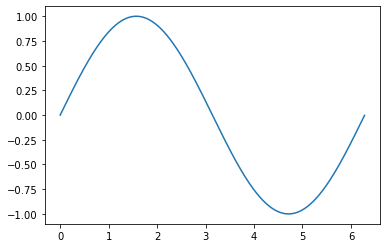

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anima

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(2 * np.pi * (x - 0.01 * i)))  # update the data.
    return line,


ani = anima.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

HTML(ani.to_html5_video())

In [5]:
writer = animation.FFMpegWriter(
    fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg': 'ffmpeg'

In [8]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [13]:
Osat = 8

u = 0.4
v = 0

Dx = 0.5
Dy = 0.5
Kr = 0.01
Kd = 0.01
Ka = 0.02

Qs = 70

In [14]:
L = 150
W = 30

dx = 1
dy = 1
dt = 0.5

Nx = int(L/dx)+1
Ny = int(W/dy)+1
print(Nx, Ny)



151 31


In [15]:
Os = [Osat * np.ones((Nx, Ny))]
Bs = [np.zeros((Nx,Ny))]

In [16]:
a = int(1/dx) #1
xo = [int(Nx/3)+i for i in range(a)] # INDICES NOT POINT
yo = [int(Ny/2)+i for i in range(a)]

In [17]:
t = 0
tfinal=500


while(t<tfinal):
    On_1 = Osat * np.ones((Nx, Ny))
    Bn_1 = np.zeros((Nx, Ny))

    for x in range(1,Nx): # 1 so that inflow remains at saturation
        for y in range(Ny):
            RB = Bs[-1][x+1, y] if(x!=(Nx-1)) else Bs[-1][-2, y]
            LB = Bs[-1][x-1, y]
            UB = Bs[-1][x, y+1] if (y!=(Ny-1)) else Bs[-1][x, -2]
            DB = Bs[-1][x, y-1] if(y!=0) else Bs[-1][x, 1]
            CB = Bs[-1][x, y]

            RO = Os[-1][x+1, y] if(x!=(Nx-1)) else Os[-1][-2, y]
            LO = Os[-1][x-1, y]
            UO = Os[-1][x, y+1] if (y!=(Ny-1)) else Os[-1][x, -2]
            DO = Os[-1][x, y-1] if (y!=0) else Os[-1][x, 1]
            CO = Os[-1][x, y]

            temp = (Dx/dx**2)*(RB - 2*CB + LB) + (Dy/dy**2)*(UB - 2*CB + DB)
            delta = (Qs/(dx*dy/a**2)) if(x in xo and y in yo) else 0 # not sure why you're multiplying by dt here! (this happens two lines down)
            Bnew = temp - Kr*CB + delta - (u/(2*dx))*(RB - LB) - (v/(2*dy))*(UB - DB)

            Bn_1[x, y] = dt*Bnew + CB


            temp = (Dx/dx**2)*(RO - 2*CO + LO) + (Dy/dy**2)*(UO - 2*CO + DO)

            Onew = temp - Kd*CB + Ka*(Osat-CO) - (u/(2*dx))*(RO - LO) - (v/(2*dy)) * (UO - DO)
            On_1[x, y] = dt*Onew + CO                  

    Os.append(On_1)
    Bs.append(Bn_1)

    if (t % 5 < 0.1):
        print(t)
    t += dt      


0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0
105.0
110.0
115.0
120.0
125.0
130.0
135.0
140.0
145.0
150.0
155.0
160.0
165.0
170.0
175.0
180.0
185.0
190.0
195.0
200.0
205.0
210.0
215.0
220.0
225.0
230.0
235.0
240.0
245.0
250.0
255.0
260.0
265.0
270.0
275.0
280.0
285.0
290.0
295.0
300.0
305.0
310.0
315.0
320.0
325.0
330.0
335.0
340.0
345.0
350.0
355.0
360.0
365.0
370.0
375.0
380.0
385.0
390.0
395.0
400.0
405.0
410.0
415.0
420.0
425.0
430.0
435.0
440.0
445.0
450.0
455.0
460.0
465.0
470.0
475.0
480.0
485.0
490.0
495.0


In [18]:
from celluloid import Camera

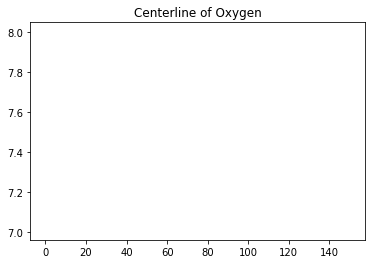

In [16]:
fig = plt.figure()
camera = Camera(fig)

for t in range(0,int(tfinal/dt), 5):
  plt.plot(range(Nx), Os[t][:, yo[0]])
  plt.title("Centerline of Oxygen")
  camera.snap()

animation = camera.animate()
animation.save('Centerline.gif', writer = 'imagemagick')

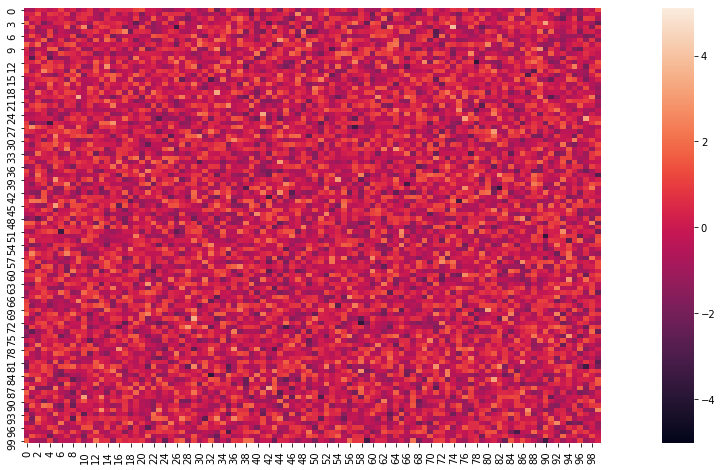

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# generate random noise for the heatmap
rnd_data = np.random.normal(0, 1, (500, 100, 100))

def my_func(i):
    ax.cla()
    sns.heatmap(rnd_data[i, ...],
                ax = ax,
                cbar = True,
                cbar_ax = cbar_ax,
                vmin = rnd_data.min(),
                vmax = rnd_data.max())

grid_kws = {'width_ratios': (0.9, 0.05), 'wspace': 0.2}
fig, (ax, cbar_ax) = plt.subplots(1, 2, gridspec_kw = grid_kws, figsize = (12, 8))
anim = FuncAnimation(fig = fig, func = my_func, frames = 200, interval = 50, blit = False)

plt.show()